In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

### Reading Data

In [ ]:
df = pd.read_excel('/content/data.xlsx')
y = df.iloc[:,-1]
x = df.iloc[:,[0,1]]
#print(df.head())
#print(x.head())

### Normalising data 

In [ ]:
x = (x - x.mean())/ (x.max() - x.min())
x = pd.DataFrame(x)
x.insert(0, 'x0', 1, True)
#x.head()

### DATA visualization

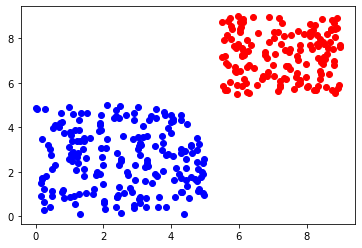

In [ ]:
pur_data= df.loc[df['label'] == 1]
pur_x = pur_data['x']
pur_y = pur_data['y']


n_pur_data= df.loc[df['label'] == -1]
n_pur_x = n_pur_data['x']
n_pur_y = n_pur_data['y']

plt.subplot(111)
plt.plot(pur_x,pur_y,'bo')
plt.plot(n_pur_x,n_pur_y,'ro')
plt.show()

### AS we can see the data is linearly seperable we go for SVM without kernel

## splitting data set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.65)
print(x_train.head())
print(y_train.head())
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

     x0         x         y
196   1 -0.158167 -0.114181
256   1  0.166355  0.295773
205   1 -0.446047 -0.252775
114   1 -0.431308 -0.040635
156   1 -0.351012 -0.120561
196    1
256   -1
205    1
114    1
156    1
Name: label, dtype: int64


In [ ]:
def svm(x_train, y_train, x_test, y_test, epochs, alpha):
    m, n = x_train.shape
    w = np.zeros(n)
    costs = []
    
    for i in range(epochs):
        y_pred = np.dot(x_train, w)
        cost = 0
        prod = y_train * y_pred
        for j in range(prod.shape[0]):
            val = prod[j]
            if(val >= 1):
            
                w = w - alpha * (2 * 1/epochs * w)
            else:
                cost = cost + 1 - val 
                w = w + alpha * (x_train[j].T * y_train[j]  - 2 * 1/epochs * w)  
                
            costs.append(cost)
    return w, costs

In [ ]:
w, costs= svm(x_train, y_train, x_test, y_test, 500, 5e-4)

In [ ]:
def pred(X):
  y = (np.dot(w, X))
  return y.T

In [ ]:
y_pred = np.dot(x_test, w)
predictions = []
for val in y_pred:
    if(val >= 1):
        predictions.append(1)
    else:
        predictions.append(-1)
predictions = np.array(predictions)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.926829268292683


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predictions, y_test)
cm

array([[54,  9],
       [ 0, 60]])

In [ ]:
tp=cm[0][0]
fn=cm[1][0]
fp=cm[0][1]
tn=cm[1][1]

accuracy = (tp+tn)/np.sum(cm)
precision=tp/(tp+tn)
recall=tp/(tp+fn)
f_score=2*recall*precision/(recall+precision)

print("Accuracy : ",accuracy)
print("Precision : ",precision)
print("Recall : ",recall)
print("F_score : ",f_score)

Accuracy :  0.926829268292683
Precision :  0.47368421052631576
Recall :  1.0
F_score :  0.6428571428571429


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


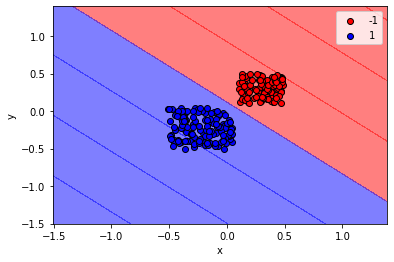

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train

X_grid_1 = np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1,
step = 0.1)

X_grid_2 = np.arange(start = X_set[:, 2].min() - 1, stop = X_set[:, 2].max() + 1,
step = 0.1)

X0 = np.ones((X_grid_1.shape[0], X_grid_1.shape[0]))

X1, X2  = np.meshgrid(X_grid_1, X_grid_2)

X3 = pred(np.array([X0.ravel(), X1.ravel(), X2.ravel()])).reshape(X1.shape)
plt.contourf(X1, X2, X3, alpha = 0.50, cmap = ListedColormap(("red",
"blue")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

X_zero_0 = []
X_one_0 = []
X_zero_1 = []
X_one_1 = []
for i in range(len(y_set)):
        if y_set[i] == -1 :
            X_zero_0.append(X_set[i,1])
            X_zero_1.append(X_set[i,2])
        else:
            X_one_0.append(X_set[i,1])
            X_one_1.append(X_set[i,2])
            
plt.scatter(X_zero_0, X_zero_1, c = ListedColormap(("red", "blue"))(-1), label = -1,edgecolors = "Black")
plt.scatter(X_one_0, X_one_1, c = ListedColormap(("red", "blue"))(1), label = 1,edgecolors = "Black")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig('out.png',bbox_inches='tight')
plt.show()